In [5]:
# TODO, show how different aggression configurations impact results
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from transpile_benchy.metrics.abc_metrics import MetricInterface
from transpile_benchy.metrics.gate_counts import DepthMetric
from mirror_gates.utilities import DoNothing
from mirror_gates.logging import transpile_benchy_logger

In [6]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/select.txt")
coupling_map = CouplingMap.from_heavy_hex(5)

In [7]:
total_work = 80
transpilers = [
    QiskitLevel3(coupling_map),
    Mirage(coupling_map, name="Mirage"),
    # Mirage(
    #     coupling_map,
    #     name="Mirage-b2",
    #     layout_trials=3,
    #     fb_iters=total_work // 3,
    #     anneal_routing=True,
    # ),
    Mirage(
        coupling_map,
        name="Mirage-b3",
        layout_trials=4,
        fb_iters=total_work // 4,
        anneal_routing=True,
    ),
]

metrics = [DepthMetric(consolidate=False)]

In [8]:
from transpile_benchy.benchmark import Benchmark

# only interested in TimeMetric, is there by default
benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    num_runs=1,
    logger=transpile_benchy_logger,
)
benchmark.run()

INFO:transpile_benchy:Running benchmarks for circuits...
Circuits from library:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:transpile_benchy:Running benchmark for circuit qft_n18


Loading qft_n18 from QASMBench


Circuits from library:  17%|█▋        | 1/6 [01:31<07:38, 91.73s/it]INFO:transpile_benchy:Running benchmark for circuit bigadder_n18


Loading bigadder_n18 from QASMBench


Circuits from library:  33%|███▎      | 2/6 [02:29<04:47, 71.86s/it]INFO:transpile_benchy:Running benchmark for circuit qram_n20


Loading qram_n20 from QASMBench


Circuits from library:  50%|█████     | 3/6 [03:22<03:09, 63.02s/it]INFO:transpile_benchy:Running benchmark for circuit sat_n11


Loading sat_n11 from QASMBench


Circuits from library:  67%|██████▋   | 4/6 [04:48<02:24, 72.31s/it]

Loading portfolioqaoa_n16 from MQTBench


INFO:transpile_benchy:Running benchmark for circuit portfolioqaoa_n16
Circuits from library:  83%|████████▎ | 5/6 [09:37<02:30, 150.22s/it]INFO:transpile_benchy:Running benchmark for circuit multiplier_n15


Loading multiplier_n15 from QASMBench


Circuits from library: 100%|██████████| 6/6 [11:18<00:00, 113.15s/it]


In [11]:
print(benchmark.summary_statistics(transpilers[0], transpilers[1])["monodromy_depth"])
print(benchmark.summary_statistics(transpilers[0], transpilers[2])["monodromy_depth"])
# print(benchmark.summary_statistics(transpilers[0], transpilers[3])["monodromy_depth"])

{'average_change': -30.198797571327173, 'aggregrate_change': -32.39110287303058, 'best_circuit': 'portfolioqaoa_n16', 'worst_circuit': 'multiplier_n15'}
{'average_change': -30.52056719877297, 'aggregrate_change': -32.113067655236335, 'best_circuit': 'portfolioqaoa_n16', 'worst_circuit': 'multiplier_n15'}


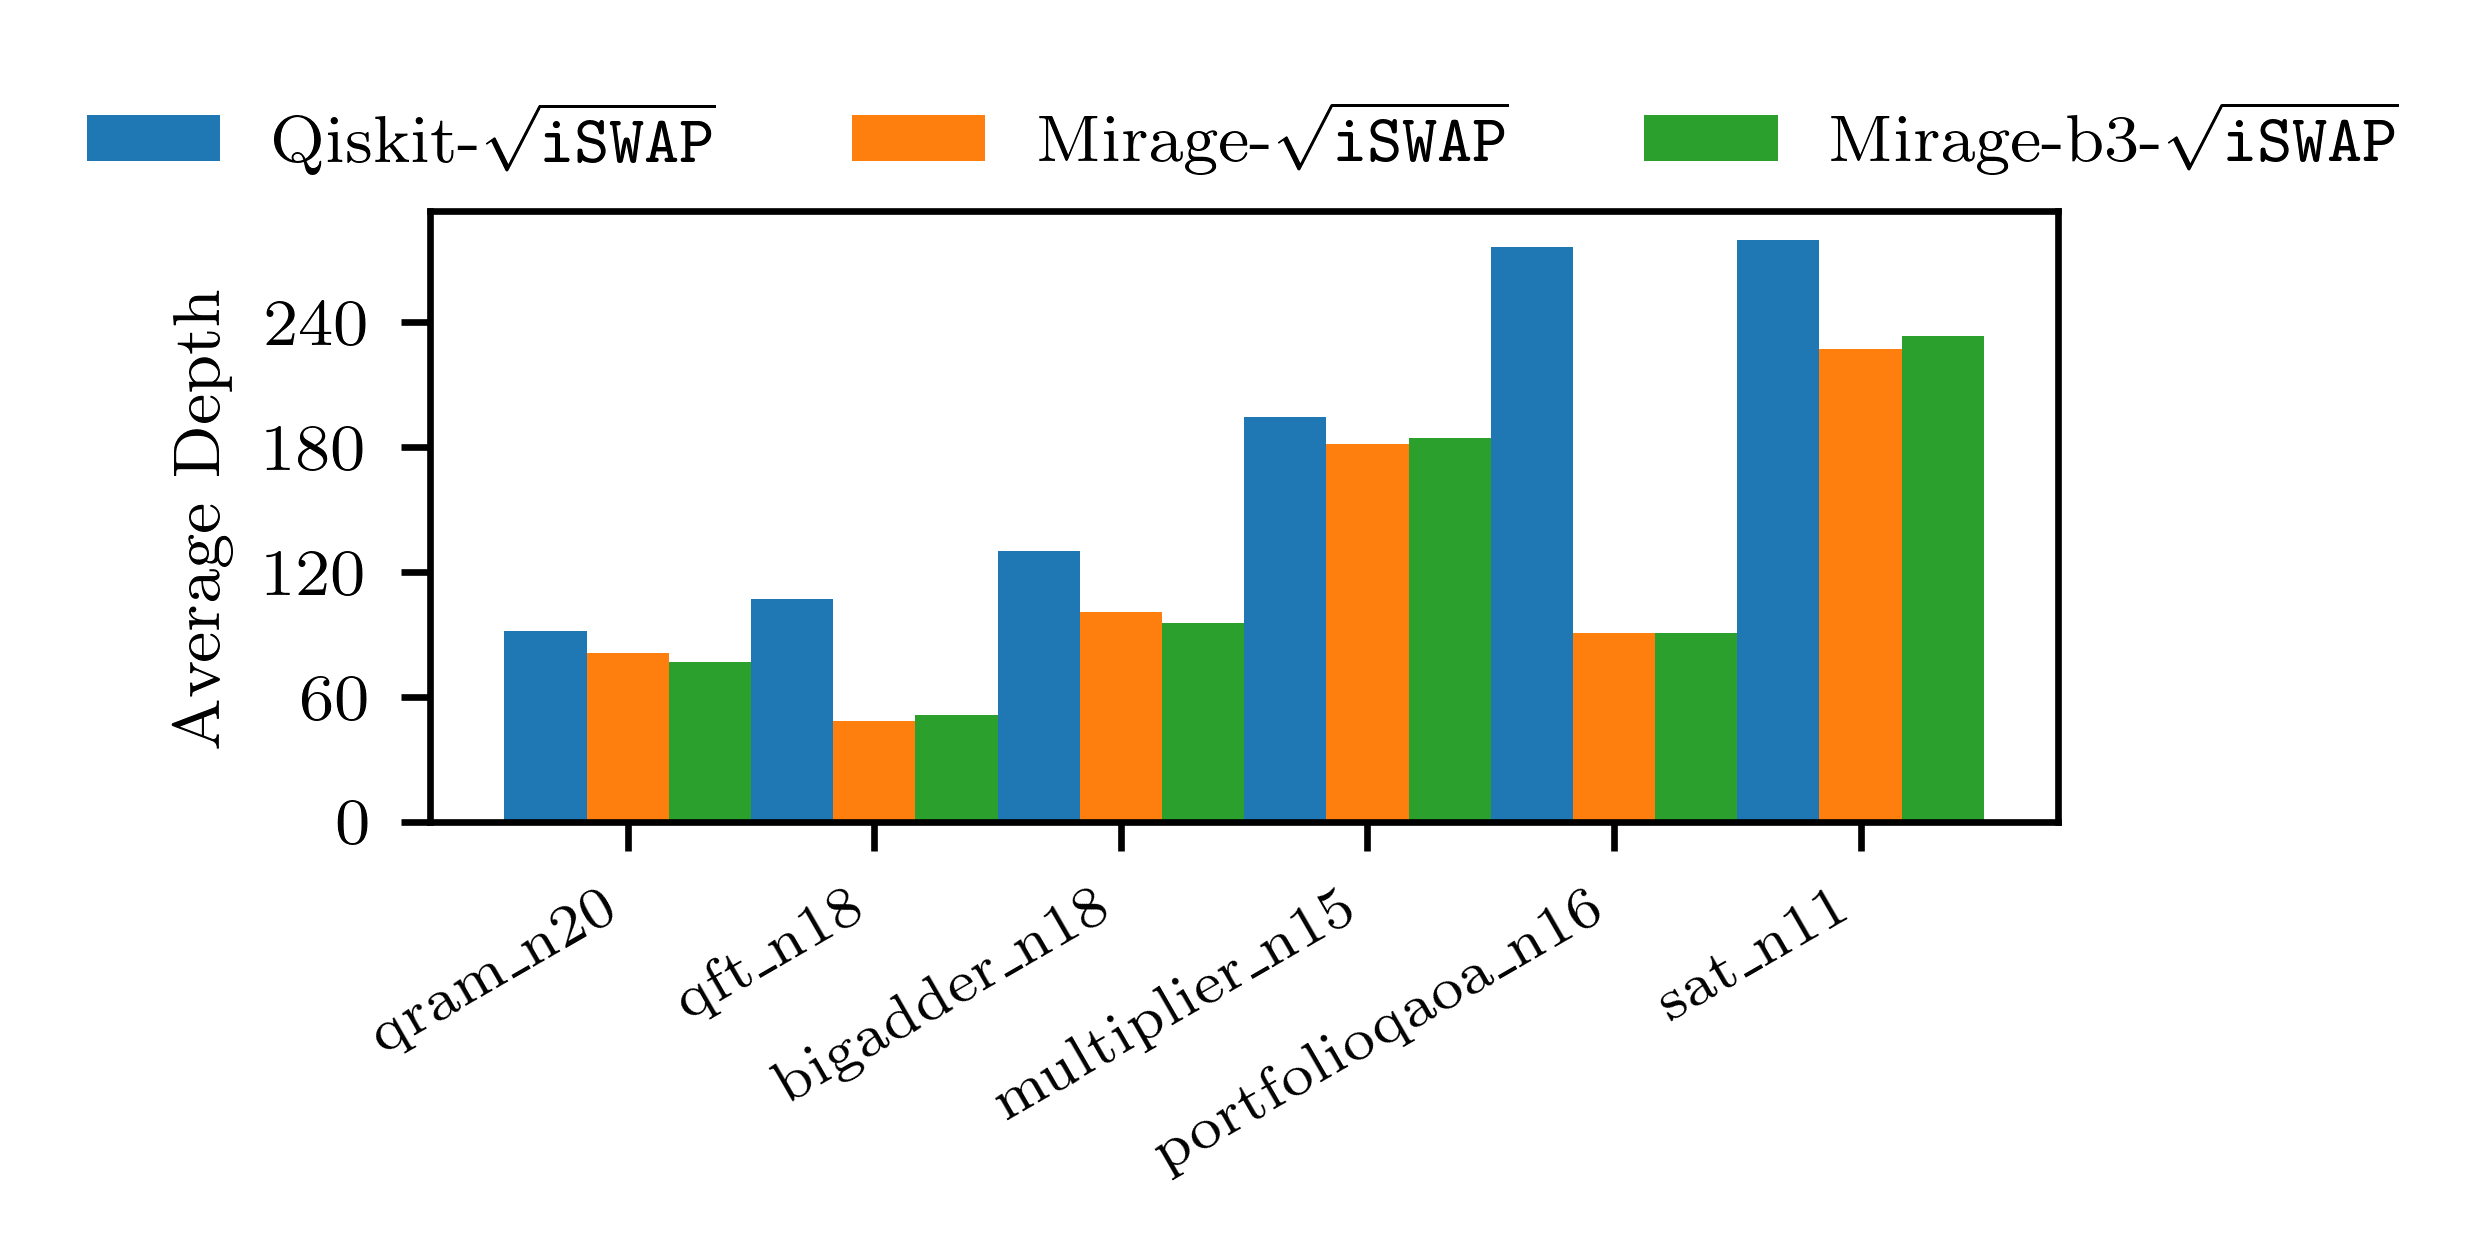

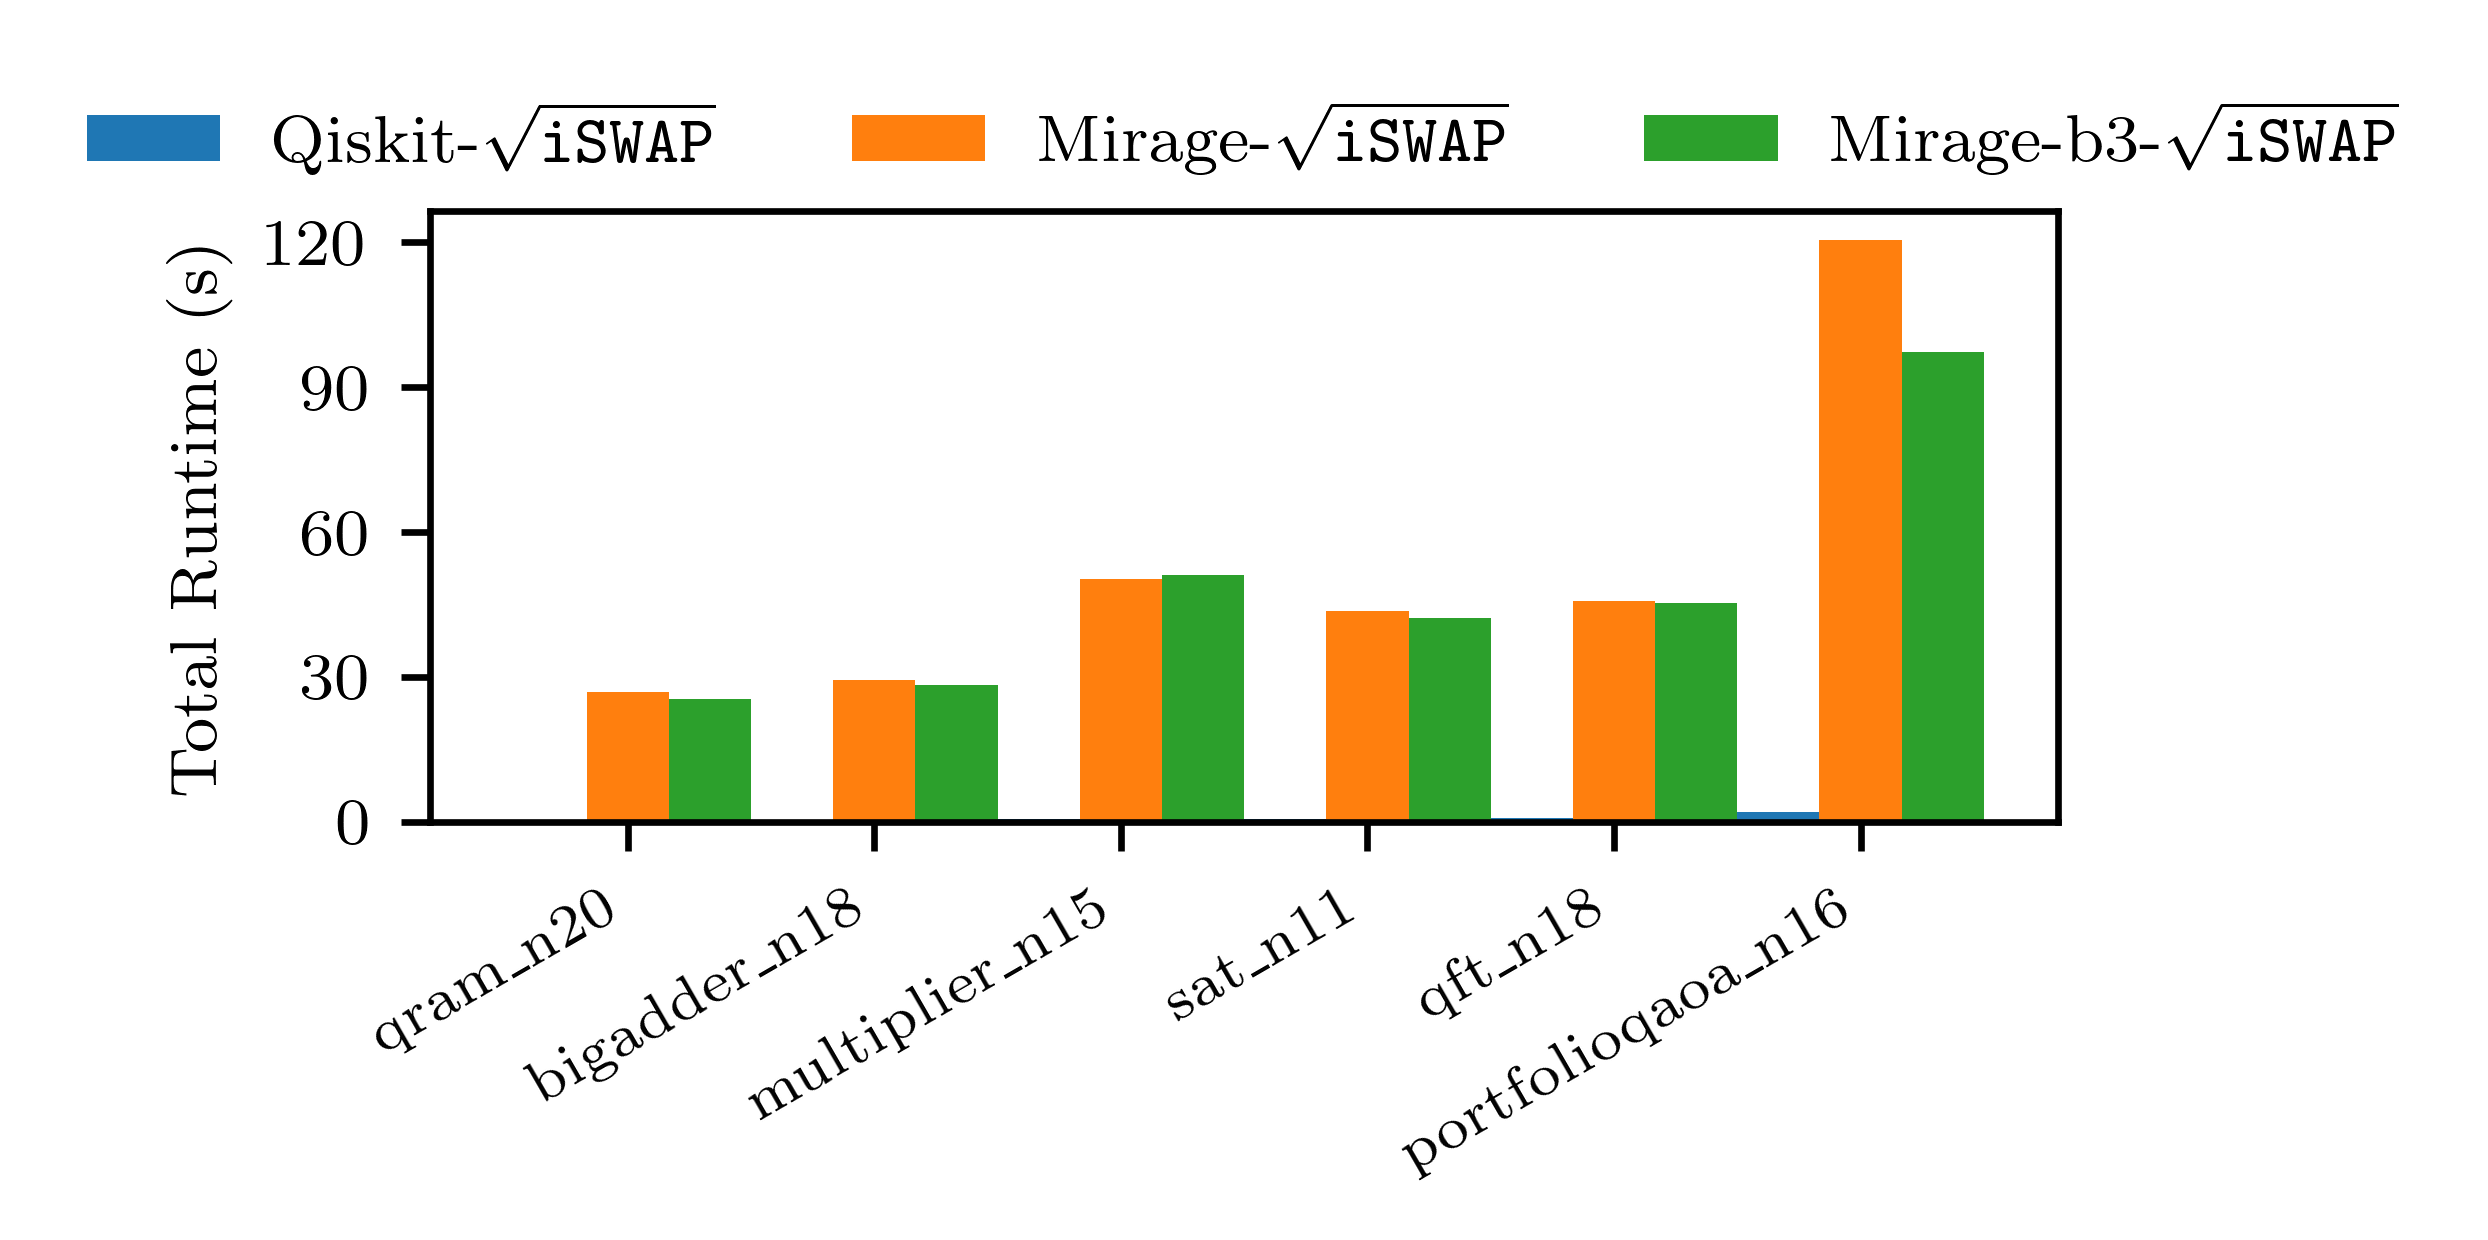

In [12]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, save=0, legend_show=1, filename="annealing")